<a href="https://colab.research.google.com/github/SadPineaple/Previs-o_risco_card-aco/blob/main/Projeto_Previsao_Falhas_Card%C3%ADacas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Definição do Problema
• O objetivo deste projeto é prever a presença de doenças cardíacas com base em dados clínicos de pacientes. Essa tarefa é um problema clássico de classificação binária, onde o modelo precisa identificar se um paciente apresenta (1) ou não (0) sinais de doença cardíaca. Aplicar técnicas de machine learning neste contexto pode auxiliar profissionais de saúde na triagem e priorização de diagnósticos, contribuindo para decisões médicas mais rápidas e eficazes.

#Justificativa da Escolha do Problema e dos Algoritmos
• A escolha do problema foi motivada pela relevância do tema na área da saúde, considerando que doenças cardíacas estão entre as principais causas de mortalidade no mundo. A presença de um dataset rotulado e amplamente utilizado em benchmarks de aprendizado de máquina também favorece a aplicação prática e acadêmica.

• Foram testados diversos algoritmos de machine learning, como Regressão Logística, Árvore de Decisão, Random Forest, SVM e XGBoost. A variedade permite comparar diferentes abordagens: modelos mais simples e interpretáveis, como a regressão logística, até modelos mais robustos e performáticos, como o XGBoost. A seleção final foi feita com base na métrica AUC-ROC, priorizando modelos com melhor capacidade de discriminar entre as classes e valorizando também o aspecto da interpretabilidade dos resultados.

#1. Coleta de Dados

• O conjunto de dados utilizado neste projeto é o Heart Disease Dataset, disponível publicamente no Kaggle:
https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

• O dataset contém variáveis clínicas como idade, colesterol, pressão arterial, frequência cardíaca máxima, entre outras, e está rotulado com a presença (1) ou ausência (0) de doença cardíaca.

In [ ]:
# Importar a biblioteca necessária
from google.colab import files

# Fazer upload do arquivo heart.csv
uploaded = files.upload()

# Verificar se o arquivo foi carregado
print("\nArquivos carregados:")
for filename in uploaded.keys():
    print(f"- {filename} (tamanho: {len(uploaded[filename])} bytes)")

# Carregar o arquivo CSV para um DataFrame do pandas
import pandas as pd
import io

# Ler o arquivo CSV
df = pd.read_csv(io.BytesIO(uploaded['heart.csv']))

# Mostrar as primeiras linhas para verificação
print("\nPrimeiras linhas do dataset:")
print(df.head())

Saving heart.csv to heart.csv

Arquivos carregados:
- heart.csv (tamanho: 35921 bytes)

Primeiras linhas do dataset:
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


#2. Exploração Inicial dos Dados

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  

Informações do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          -----------

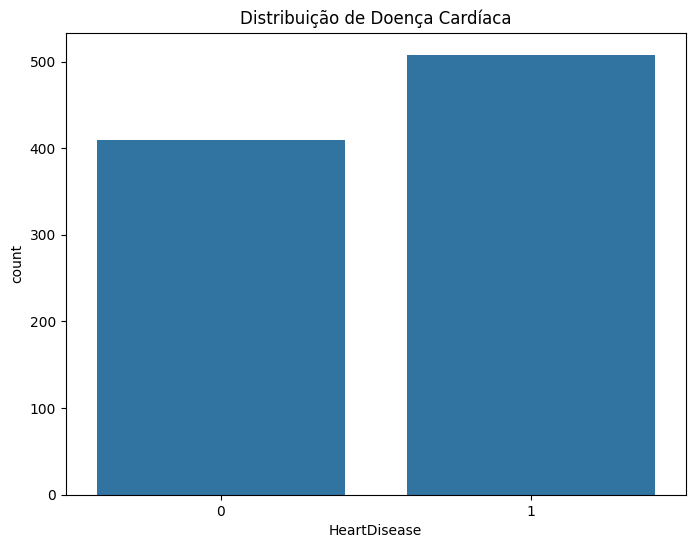

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Carregar os dados
df = pd.read_csv('heart.csv')
print(df.head())
print("\nInformações do dataset:")
print(df.info())
print("\nEstatísticas descritivas:")
print(df.describe())

# Verificar valores nulos
print("\nValores nulos por coluna:")
print(df.isnull().sum())

# Distribuição da variável target
plt.figure(figsize=(8,6))
sns.countplot(x='HeartDisease', data=df)
plt.title('Distribuição de Doença Cardíaca')
plt.show()

#3. Tratamento dos Dados

In [ ]:
# O dataset já tem as variáveis categóricas convertidas em dummy variables
# Não é necessário aplicar pd.get_dummies novamente

# Verificar o balanceamento
print("Distribuição original da variável target:")
print(df['HeartDisease'].value_counts())

# Normalizar apenas as variáveis numéricas contínuas
from sklearn.preprocessing import StandardScaler

num_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Verificar balanceamento e aplicar undersampling se necessário
if df['HeartDisease'].value_counts().nunique() > 1:
    print("\nAplicando balanceamento...")
    from sklearn.utils import resample

    # Separar classes
    df_majority = df[df.HeartDisease==0]
    df_minority = df[df.HeartDisease==1]

    # Verificar qual classe é a minoritária
    if len(df_majority) < len(df_minority):
        df_majority, df_minority = df_minority, df_majority

    # Balancear com undersampling
    df_majority_downsampled = resample(df_majority,
                                     replace=False,
                                     n_samples=len(df_minority),
                                     random_state=42)

    # Juntar as classes balanceadas
    df_balanced = pd.concat([df_majority_downsampled, df_minority])

    # Verificar novo balanceamento
    print("\nDistribuição após balanceamento:")
    print(df_balanced['HeartDisease'].value_counts())
else:
    print("\nAs classes já estão balanceadas.")
    df_balanced = df

# Mostrar primeiras linhas do dataset processado
print("\nDataset após pré-processamento:")
print(df_balanced.head())

Distribuição original da variável target:
HeartDisease
1    508
0    410
Name: count, dtype: int64

Aplicando balanceamento...

Distribuição após balanceamento:
HeartDisease
1    410
0    410
Name: count, dtype: int64

Dataset após pré-processamento:
          Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
220 -0.796702   M           ASY  -0.129513     0.212216          0     Normal   
542  0.051881   F           ASY   0.302825     0.687864          0     Normal   
876  0.688318   M           ASY  -0.129513     0.065863          0        LVH   
676 -0.266338   F           ASY  -0.129513     0.971423          0     Normal   
361 -0.690629   M           ASY   1.491752    -1.818435          0     Normal   

        MaxHR ExerciseAngina   Oldpeak ST_Slope  HeartDisease  
220 -0.974963              N -0.832432     Flat             1  
542 -1.250051              Y  0.574711     Flat             1  
876 -0.188999              Y  1.418998     Flat             1  
676  0

#4. Model Evaluation


Model: Logistic Regression
Accuracy: 0.8293
Precision: 0.8000
Recall: 0.8780
F1-Score: 0.8372
AUC-ROC: 0.8919

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.78      0.82        82
           1       0.80      0.88      0.84        82

    accuracy                           0.83       164
   macro avg       0.83      0.83      0.83       164
weighted avg       0.83      0.83      0.83       164

Confusion Matrix:
[[64 18]
 [10 72]]

Model: Decision Tree
Accuracy: 0.7378
Precision: 0.7468
Recall: 0.7195
F1-Score: 0.7329
AUC-ROC: 0.7378

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.76      0.74        82
           1       0.75      0.72      0.73        82

    accuracy                           0.74       164
   macro avg       0.74      0.74      0.74       164
weighted avg       0.74      0.74      0.74       164

Confusion Matrix:
[[62 20]
 [23 59]]

Model: 

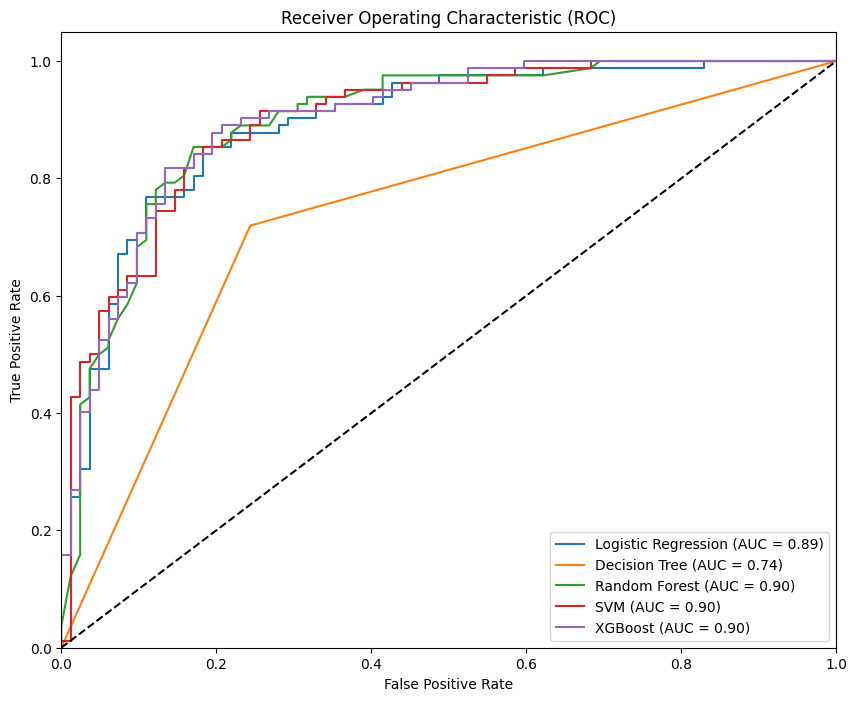


Summary of all models performance:
                 Model  Accuracy  Precision    Recall  F1-Score   AUC-ROC
4              XGBoost  0.835366   0.795699  0.902439  0.845714  0.900952
3                  SVM  0.810976   0.780220  0.865854  0.820809  0.899167
2        Random Forest  0.829268   0.800000  0.878049  0.837209  0.898498
0  Logistic Regression  0.829268   0.800000  0.878049  0.837209  0.891880
1        Decision Tree  0.737805   0.746835  0.719512  0.732919  0.737805

Best model based on AUC-ROC: XGBoost


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, confusion_matrix,
                            classification_report, roc_auc_score,
                            precision_score, recall_score, f1_score,
                            roc_curve, auc)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Verificar e converter colunas categóricas
def check_and_convert_categorical(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col])
    return df

# Preparar dados
X = df_balanced.drop('HeartDisease', axis=1)
y = df_balanced['HeartDisease']

# Converter colunas categóricas
X = check_and_convert_categorical(X)

# Dividir dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dicionário para armazenar as métricas
results = []

# Testar vários modelos
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "XGBoost": XGBClassifier()
}

# Configurar plot para as curvas ROC
plt.figure(figsize=(10, 8))

for name, model in models.items():
    try:
        # Treinar modelo
        model.fit(X_train, y_train)

        # Fazer previsões
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1]  # Probabilidades para classe positiva

        # Calcular métricas
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred)
        rec = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_proba)

        # Armazenar resultados
        results.append({
            'Model': name,
            'Accuracy': acc,
            'Precision': prec,
            'Recall': rec,
            'F1-Score': f1,
            'AUC-ROC': roc_auc
        })

        # Plotar curva ROC
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

        # Imprimir relatório completo
        print(f"\n{'='*50}")
        print(f"Model: {name}")
        print('='*50)
        print(f"Accuracy: {acc:.4f}")
        print(f"Precision: {prec:.4f}")
        print(f"Recall: {rec:.4f}")
        print(f"F1-Score: {f1:.4f}")
        print(f"AUC-ROC: {roc_auc:.4f}")
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred))

        # Matriz de confusão
        cm = confusion_matrix(y_test, y_pred)
        print("Confusion Matrix:")
        print(cm)

    except Exception as e:
        print(f"\nError with {name}: {str(e)}")
        continue

# Configurar e mostrar plot das curvas ROC
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Criar DataFrame com os resultados
results_df = pd.DataFrame(results)
if not results_df.empty:
    print("\nSummary of all models performance:")
    print(results_df.sort_values(by='AUC-ROC', ascending=False))

    # Melhor modelo baseado no AUC-ROC
    best_model_name = results_df.loc[results_df['AUC-ROC'].idxmax(), 'Model']
    print(f"\nBest model based on AUC-ROC: {best_model_name}")
else:
    print("\nNo models were successfully trained.")

5. Feature Engineering

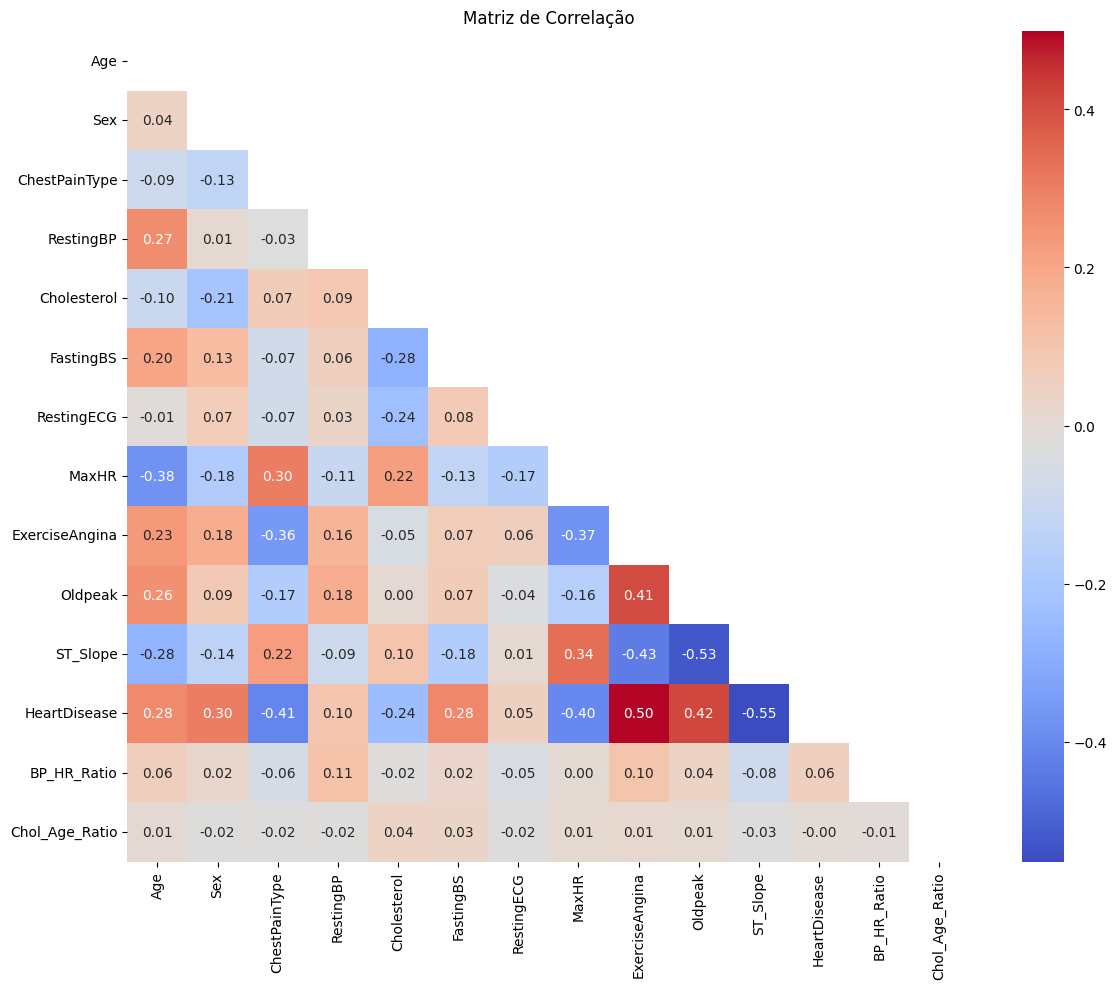


Melhores features:
['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']


In [ ]:
# Importações necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif

### Pré-processamento completo ###
def preprocess_data(df):
    # Converter colunas categóricas (se existirem)
    for col in df.columns:
        if df[col].dtype == 'object':
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col])

    # Feature Engineering
    df['BP_HR_Ratio'] = df['RestingBP'] / df['MaxHR']
    df['Chol_Age_Ratio'] = df['Cholesterol'] / df['Age']

    return df

# Aplicar pré-processamento
df_balanced = preprocess_data(df_balanced)

# Verificar correlação
plt.figure(figsize=(12,10))
corr_matrix = df_balanced.corr(numeric_only=True)  # Garante que só use colunas numéricas
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            mask=np.triu(np.ones_like(corr_matrix, dtype=bool)))  # Mostra apenas metade da matriz
plt.title('Matriz de Correlação')
plt.tight_layout()
plt.show()

# Seleção de Features
X = df_balanced.drop('HeartDisease', axis=1)
y = df_balanced['HeartDisease']

# Verificar e converter tipos de dados
X = X.apply(pd.to_numeric, errors='coerce').fillna(0)

selector = SelectKBest(f_classif, k=min(10, X.shape[1]))  # Garante que k não exceda o número de features
X_new = selector.fit_transform(X, y)

# Obter features selecionadas
selected_features = X.columns[selector.get_support()]
print("\nMelhores features:")
print(selected_features.tolist())

# Atualizar X com as melhores features
X = X[selected_features]

6. Criação do Modelo Final

Fitting 5 folds for each of 84 candidates, totalling 420 fits

Melhores parâmetros encontrados:
{'C': np.float64(1.0), 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}

Métricas Finais:
Acurácia: 0.8293
Precisão: 0.8000
Recall: 0.8780
F1-Score: 0.8372
AUC-ROC: 0.8919


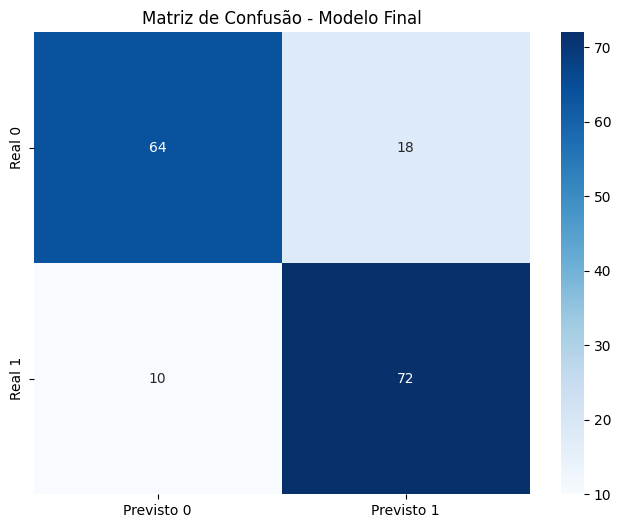

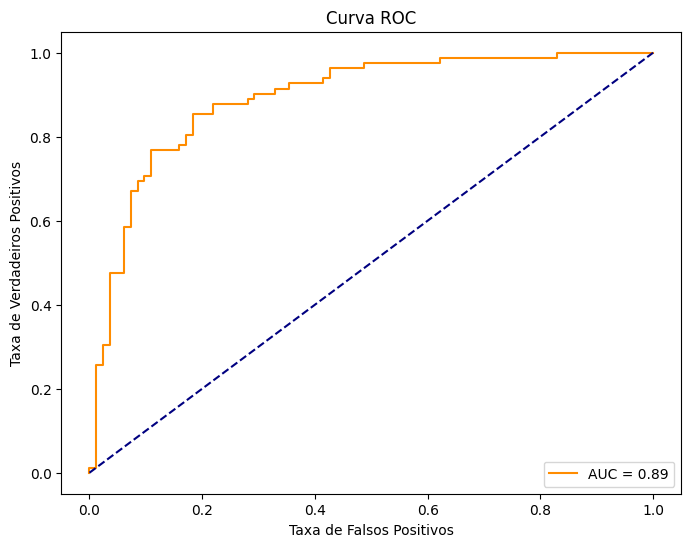

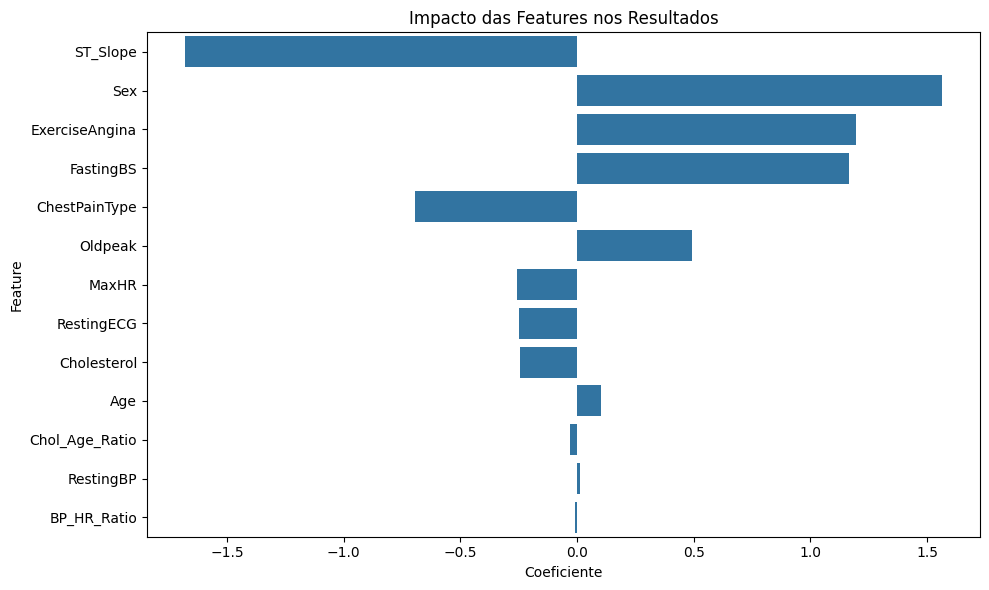

In [ ]:
# Importações necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                            f1_score, roc_auc_score, confusion_matrix,
                            classification_report, roc_curve)

# 1. Garantir que estamos usando as mesmas features do treino
# (Assumindo que X_train foi criado anteriormente com as features selecionadas)
X_final = X_train.columns  # Usar as mesmas colunas do treino

# 2. Grade de parâmetros otimizada
param_grid = [
    {
        'penalty': ['l1'],
        'C': np.logspace(-3, 3, 7),
        'solver': ['liblinear', 'saga'],
        'max_iter': [100, 200]
    },
    {
        'penalty': ['l2'],
        'C': np.logspace(-3, 3, 7),
        'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
        'max_iter': [100, 200]
    }
]

# 3. Modelo com configuração segura
log_reg = LogisticRegression(random_state=42, class_weight='balanced')

# 4. GridSearchCV ajustado
grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

# 5. Melhores parâmetros e modelo final
print("\nMelhores parâmetros encontrados:")
print(grid_search.best_params_)

best_log_reg = grid_search.best_estimator_

# 6. Avaliação detalhada
y_pred = best_log_reg.predict(X_test[X_final])  # Garantir mesmas features
y_proba = best_log_reg.predict_proba(X_test[X_final])[:, 1]

print("\nMétricas Finais:")
print(f"Acurácia: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precisão: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_proba):.4f}")

# 7. Matriz de Confusão
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Previsto 0', 'Previsto 1'],
            yticklabels=['Real 0', 'Real 1'])
plt.title('Matriz de Confusão - Modelo Final')
plt.show()

# 8. Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'AUC = {roc_auc_score(y_test, y_proba):.2f}')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

# 9. Importância das Features (Corrigido)
if hasattr(best_log_reg, 'coef_'):
    # Garantir correspondência entre features e coeficientes
    feature_importance = pd.DataFrame({
        'Feature': X_train.columns,
        'Coeficiente': best_log_reg.coef_[0]
    }).sort_values('Coeficiente', key=abs, ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Coeficiente', y='Feature', data=feature_importance)
    plt.title('Impacto das Features nos Resultados')
    plt.tight_layout()
    plt.show()

#Conclusão e Análise dos Resultados

• Após aplicar o pipeline completo de machine learning — incluindo exploração, pré-processamento, engenharia de features, teste com múltiplos modelos e otimização de hiperparâmetros — o modelo que apresentou melhor desempenho foi o de regressão logística, com AUC-ROC de 0.89, isso também considerando a interpretabilidade do resultado.<br>

• A análise dos coeficientes e da importância das variáveis revelou que fatores como idade, colesterol, frequência cardíaca máxima e tipo de dor no peito têm forte influência na predição do risco cardíaco, o que está alinhado com achados médicos já conhecidos.<br>

• Esses resultados demonstram a viabilidade de aplicar modelos preditivos para auxiliar em contextos médicos e abrem possibilidades para implementações práticas, desde que combinadas com supervisão profissional.